In [2]:
import tensorflow as tf
import tensorflow.keras as tfk
import numpy as np
import matplotlib.pyplot as plt


(a)

In [3]:
(x_train, y_train), (x_test, y_test) = tfk.datasets.cifar10.load_data()


In [4]:
X = np.vstack((x_train,x_test))
y = np.vstack((y_train,y_test))
y = y.flatten()

(b)

In [5]:
# find out which label has class = bird
ind = [i for i,j in enumerate(y) if j == 2]

In [6]:
X_bird = X[ind]
y_bird = y[ind]

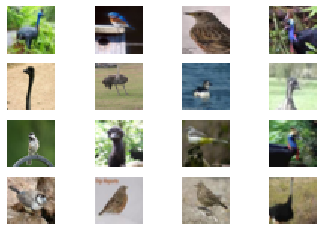

In [7]:
#show some image of bird class
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_bird[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

(c)

In [8]:
# flatten the data of X_bird
X_bird = X_bird.reshape((6144000,3))

(d)

In [9]:
from sklearn.cluster import KMeans

In [10]:
colors=4
kMeansModel = KMeans(n_clusters=colors)
kMeansModel = kMeansModel.fit(X_bird)
mainColors = kMeansModel.cluster_centers_
print('RGB of', colors, 'Main Colors:')
print(mainColors)

RGB of 4 Main Colors:
[[107.59334388 107.32953077  81.6975248 ]
 [205.63993345 210.92823907 210.54303798]
 [155.32306759 154.47053585 133.87885466]
 [ 48.16881265  49.15550775  37.91756   ]]


In [11]:
X_new = X_bird
for i in range(len(X_bird)):
    X_new[i] = mainColors[kMeansModel.labels_[i]]

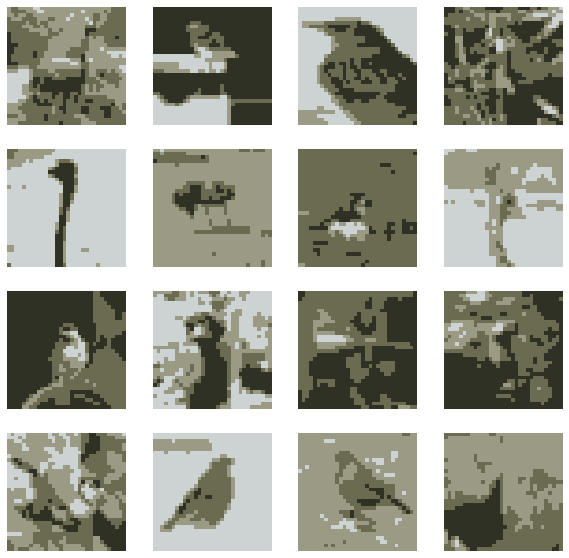

In [12]:
#show some of the result
X_viz = X_new.reshape((6000,32,32,3))
fig = plt.figure(figsize=(10,10))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_viz[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

(e)

In [23]:
from skimage.color import rgb2grey
X_temp = X_bird.reshape((6000,32,32,3))
X_N = []
for i in range(len(X_temp)):
    X_N.append(rgb2grey(X_temp[i]).tolist())
    
X_N = np.array(X_N)
    

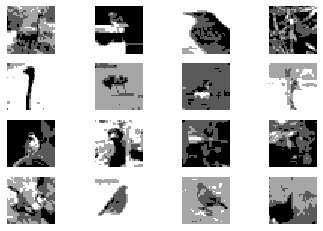

In [24]:
#print some grey images
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

(f)

In [25]:
#one-hot for y
y_N = tf.keras.utils.to_categorical(kMeansModel.labels_).reshape((6000,32,32,4))

In [26]:
X_N = np.array(X_N).reshape((6000,32,32,1))

In [27]:
# train & test split
X_train = X_N[0:5900]
y_train = y_N[0:5900]
X_test = X_N[-100:]
y_test = y_N[-100:]

In [28]:

import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense



cnn = keras.models.Sequential()
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
cnn.add(Dense(32, activation='softmax'))
cnn.add(Dense(4, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_3 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
________________________________________________

In [29]:
#compile 
cnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
#run model
history = cnn.fit(X_train, y_train, epochs=30, validation_split=0.1)

Train on 5310 samples, validate on 590 samples
Epoch 1/30
5310/5310 [==============================] - 26s 5ms/step - loss: 1.3686 - accuracy: 0.3349 - val_loss: 1.3600 - val_accuracy: 0.3312
Epoch 2/30
5310/5310 [==============================] - 28s 5ms/step - loss: 1.3535 - accuracy: 0.3349 - val_loss: 1.3505 - val_accuracy: 0.3312
Epoch 3/30
5310/5310 [==============================] - 28s 5ms/step - loss: 1.3463 - accuracy: 0.3349 - val_loss: 1.3457 - val_accuracy: 0.3312
Epoch 4/30
5310/5310 [==============================] - 28s 5ms/step - loss: 1.3422 - accuracy: 0.3349 - val_loss: 1.3426 - val_accuracy: 0.3312
Epoch 5/30
5310/5310 [==============================] - 28s 5ms/step - loss: 1.3390 - accuracy: 0.3349 - val_loss: 1.3396 - val_accuracy: 0.3312
Epoch 6/30
5310/5310 [==============================] - 28s 5ms/step - loss: 1.3356 - accuracy: 0.3349 - val_loss: 1.3359 - val_accuracy: 0.3312
Epoch 7/30
5310/5310 [==============================] - 28s 5ms/step - loss: 1.3311

In [30]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

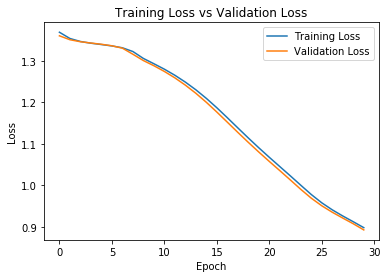

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [32]:
predictions = cnn.predict(X_test)

In [33]:
predictions.shape

(100, 32, 32, 4)

In [34]:
predictions = predictions.reshape((102400,4))
pred = predictions[:,0:3]
for i in range(len(predictions)):
    pred[i] = kMeansModel.cluster_centers_[np.argmax(predictions[i])].tolist()
pred = pred.reshape((100,32,32,3))


In [38]:
#test error 
error =0
for i in range(100):
    if not np.array_equal(pred[i],y_test[i]):
        error +=1
print(error/len(pred))

1.0


In [42]:
#train error
error =0
prediction_train = cnn.predict(X_train)
prediction_train = prediction_train.reshape((6041600,4))
pred_train = prediction_train[:,0:3]
for i in range(len(predictions)):
    pred_train[i] = kMeansModel.cluster_centers_[np.argmax(prediction_train[i])].tolist()
pred_train = pred_train.reshape((5900,32,32,3))


for i in range(5900):
    if not np.array_equal(pred_train[i],y_train[i]):
        error +=1
print(error/len(pred_train))

1.0


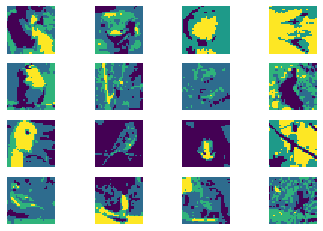

In [43]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_test.reshape(100,32,32)[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

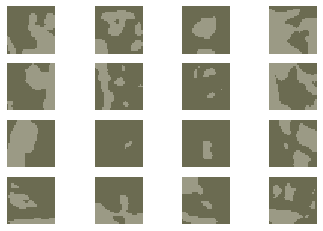

In [44]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = pred[i]
    axis.imshow(np.array(arr,np.int32))
    plt.axis('off')
plt.show()